In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Financial_Statement.csv')

# Function to prepare data for a single company
def analyze_company_parameters(company_data):
    # Convert to numeric, coercing errors to NaN
    company_data = company_data.apply(pd.to_numeric, errors='coerce')
    
    # Remove non-numeric columns and handle missing values
    numeric_data = company_data.select_dtypes(include=[np.number])
    
    # Compute correlation matrix
    try:
        corr_matrix = numeric_data.corr()
        
        # Find top 5 parameters most correlated with repurchase of common stock
        repurchase_col = numeric_data.columns[numeric_data.columns.str.contains('repurchase of common stock', case=False)]
        
        if len(repurchase_col) > 0:
            top_params = corr_matrix[repurchase_col[0]].abs().sort_values(ascending=False)[1:6]
            return top_params
        else:
            return pd.Series()
    except Exception as e:
        print(f"Error processing company data: {e}")
        return pd.Series()

# Dictionary to store results
company_top_params = {}

# Analyze each company
companies = df['company_name'].unique()
for company in companies:
    if company == 'DRQ':  # Skip companies with no data
        continue
    
    # Pivot the data
    company_data = df[df['company_name'] == company].pivot_table(
        index='year', 
        columns='parameter', 
        values='value', 
        aggfunc='first'
    )
    
    top_params = analyze_company_parameters(company_data)
    company_top_params[company] = top_params

# Prepare results for CSV
results_list = []
for company, params in company_top_params.items():
    for param, correlation in params.items():
        results_list.append({
            'Company': company,
            'Parameter': param,
            'Correlation': correlation
        })

# Create DataFrame and save to CSV
results_df = pd.DataFrame(results_list)
results_df.to_csv('stock_parameter_dependencies.csv', index=False)

# Visualization - Heatmap
plt.figure(figsize=(20, 12))
pivot_df = results_df.pivot(index='Company', columns='Parameter', values='Correlation')
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Top 5 Parameters Correlated with Repurchase of Common Stock by Company', fontsize=16)
plt.xlabel('Parameters', fontsize=12)
plt.ylabel('Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('stock_parameter_correlation_heatmap.png', dpi=300)
plt.close()

# Print detailed results
print("Top 5 Parameters Correlated with Repurchase of Common Stock:")
print(results_df)
print("\nResults saved to 'stock_parameter_dependencies.csv'")
print("Heatmap saved to 'stock_parameter_correlation_heatmap.png'")

KeyError: 'value'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Financial_Statement.csv')

# Reshape the dataframe
df_reshaped = df.pivot_table(
    index=['company_name', 'year'], 
    columns='parameter', 
    values='2023',  # Using 2023 as an example year
    aggfunc='first'
).reset_index()

# Function to analyze parameters for a single company
def analyze_company_parameters(company_data):
    # Convert to numeric, coercing errors to NaN
    numeric_cols = company_data.select_dtypes(include=[np.number]).columns
    company_numeric = company_data[numeric_cols]
    
    # Compute correlation matrix
    try:
        corr_matrix = company_numeric.corr()
        
        # Find top 5 parameters most correlated with repurchase of common stock
        repurchase_col = [col for col in corr_matrix.columns if 'repurchase of common stock' in col.lower()]
        
        if repurchase_col:
            top_params = corr_matrix[repurchase_col[0]].abs().sort_values(ascending=False)[1:6]
            return top_params
        else:
            return pd.Series()
    except Exception as e:
        print(f"Error processing company data: {e}")
        return pd.Series()

# Dictionary to store results
company_top_params = {}

# Analyze each company
companies = df_reshaped['company_name'].unique()
for company in companies:
    if company == 'DRQ':  # Skip companies with no data
        continue
    
    company_data = df_reshaped[df_reshaped['company_name'] == company]
    top_params = analyze_company_parameters(company_data)
    company_top_params[company] = top_params

# Prepare results for CSV
results_list = []
for company, params in company_top_params.items():
    for param, correlation in params.items():
        results_list.append({
            'Company': company,
            'Parameter': param,
            'Correlation': correlation
        })

# Create DataFrame and save to CSV
results_df = pd.DataFrame(results_list)
results_df.to_csv('stock_parameter_dependencies.csv', index=False)

# Visualization - Heatmap
plt.figure(figsize=(20, 12))
pivot_df = results_df.pivot(index='Company', columns='Parameter', values='Correlation')
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Top 5 Parameters Correlated with Repurchase of Common Stock by Company', fontsize=16)
plt.xlabel('Parameters', fontsize=12)
plt.ylabel('Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('stock_parameter_correlation_heatmap.png', dpi=300)
plt.close()

# Print detailed results
print("Top 5 Parameters Correlated with Repurchase of Common Stock:")
print(results_df)
print("\nResults saved to 'stock_parameter_dependencies.csv'")
print("Heatmap saved to 'stock_parameter_correlation_heatmap.png'")

KeyError: 'parameter'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Financial_Statement.csv')

# Print column names to verify
print("Columns in the DataFrame:", df.columns.tolist())

# Prepare the data
def prepare_company_data(company_name):
    # Filter data for the specific company
    company_df = df[df['company_name'] == company_name]
    
    # Create a pivot DataFrame
    pivot_df = company_df.pivot(index='year', columns='parameter', values=['2019', '2020', '2021', '2022', '2023'])
    
    # Flatten column multi-index
    pivot_df.columns = [f'{col[1]}_{col[0]}' for col in pivot_df.columns]
    
    return pivot_df

# Function to analyze correlations
def analyze_correlations(data):
    try:
        # Convert to numeric, handling any conversion errors
        numeric_data = data.apply(pd.to_numeric, errors='coerce')
        
        # Compute correlation matrix
        corr_matrix = numeric_data.corr()
        
        # Find columns related to repurchase of common stock
        repurchase_cols = [col for col in corr_matrix.columns if 'repurchase of common stock' in col.lower()]
        
        if repurchase_cols:
            # Get top 5 correlated parameters
            top_params = corr_matrix[repurchase_cols[0]].abs().sort_values(ascending=False)[1:6]
            return top_params
        else:
            return pd.Series()
    except Exception as e:
        print(f"Error in correlation analysis: {e}")
        return pd.Series()

# Analyze companies
companies = df['company_name'].unique()
results_list = []

for company in companies:
    if company == 'DRQ':  # Skip companies with no data
        continue
    
    try:
        # Prepare company data
        company_data = prepare_company_data(company)
        
        # Analyze correlations
        top_params = analyze_correlations(company_data)
        
        # Store results
        for param, correlation in top_params.items():
            results_list.append({
                'Company': company,
                'Parameter': param,
                'Correlation': correlation
            })
    except Exception as e:
        print(f"Error processing {company}: {e}")

# Create results DataFrame
results_df = pd.DataFrame(results_list)

# Save to CSV
results_df.to_csv('stock_parameter_dependencies.csv', index=False)

# Visualization - Heatmap
plt.figure(figsize=(20, 12))
pivot_plot_df = results_df.pivot(index='Company', columns='Parameter', values='Correlation')
sns.heatmap(pivot_plot_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Top 5 Parameters Correlated with Repurchase of Common Stock by Company', fontsize=16)
plt.xlabel('Parameters', fontsize=12)
plt.ylabel('Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('stock_parameter_correlation_heatmap.png', dpi=300)
plt.close()

# Print results
print("\nTop 5 Parameters Correlated with Repurchase of Common Stock:")
print(results_df)
print("\nResults saved to 'stock_parameter_dependencies.csv'")
print("Heatmap saved to 'stock_parameter_correlation_heatmap.png'")

Columns in the DataFrame: ['company_name', 'year', '2019', '2020', '2021', '2022', '2023']
Error processing SLB: 'parameter'
Error processing HAL: 'parameter'
Error processing BKR: 'parameter'
Error processing WFRD: 'parameter'
Error processing CHX: 'parameter'
Error processing FTI: 'parameter'
Error processing NOV: 'parameter'
Error processing WHD: 'parameter'


KeyError: 'Company'

<Figure size 2000x1200 with 0 Axes>

In [6]:
print(df.columns.tolist())
print(df.head())

['company_name', 'year', '2019', '2020', '2021', '2022', '2023']
  company_name                   year   2019   2020   2021   2022   2023
0          SLB                revenue  32917  23601  22929  28091  22929
1          SLB         sales of goods   8559   7608   7327   8539  10696
2          SLB      sales of services  24358  16533  15602  19552  22439
3          SLB     cost of goods sold   7892   6325   6142   7697   9341
4          SLB  cost of services sold  20828  14675  13129  15233  17231


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Financial_Statement.csv'
data = pd.read_csv(file_path)

# Reshape the dataset to make it analysis-friendly
reshaped_data = data.set_index(['company_name', 'year']).T
reshaped_data.columns.names = ['Company', 'Parameter']
reshaped_data = reshaped_data.apply(pd.to_numeric, errors='coerce')

# Placeholder to store results for top parameters
results = {}

# Iterate over each company to analyze correlations
for company in reshaped_data.columns.get_level_values("Company").unique():
    company_data = reshaped_data[company]

    # Exclude 'repurchase of common stock' if it exists
    if "repurchase of common stock" in company_data.columns:
        company_data = company_data.drop(columns="repurchase of common stock")

    # Ensure all data is numeric and drop rows with missing values
    company_data = company_data.dropna().astype(float)

    # Compute correlations with 'stock price' (assuming it exists)
    if "stock price" in company_data.columns:
        stock_price_corr = company_data.corrwith(company_data["stock price"]).drop("stock price")
    else:
        continue  # Skip if 'stock price' is not in the data

    # Select top 5 correlated parameters
    top_5 = stock_price_corr.abs().nlargest(5).index.tolist()
    results[company] = top_5

    # Plot heatmap of top 5 parameters
    heatmap_data = company_data[top_5]
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Top 5 Parameters Correlation Heatmap - {company}")
    plt.show()

# Save top parameters to a CSV file
top_parameters_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in results.items()]))
output_file_path = "Top_5_Parameters_Per_Company.csv"
top_parameters_df.to_csv(output_file_path, index=False)

print(f"Results saved to {output_file_path}")


Results saved to Top_5_Parameters_Per_Company.csv


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Financial_Statement.csv'
data = pd.read_csv(file_path)

# Reshape the dataset to make it analysis-friendly
reshaped_data = data.set_index(['company_name', 'year']).T
reshaped_data.columns.names = ['Company', 'Parameter']
reshaped_data = reshaped_data.apply(pd.to_numeric, errors='coerce')

# Placeholder to store results for top parameters
results = {}

# Iterate over each company to analyze correlations
for company in reshaped_data.columns.get_level_values("Company").unique():
    company_data = reshaped_data[company]

    # Exclude 'repurchase of common stock' if it exists
    if "repurchase of common stock" in company_data.columns:
        company_data = company_data.drop(columns="repurchase of common stock")

    # Ensure all data is numeric and drop rows with missing values
    company_data = company_data.dropna().astype(float)

    # Compute correlations with 'stock price' (assuming it exists)
    if "stock price" in company_data.columns:
        stock_price_corr = company_data.corrwith(company_data["stock price"]).drop("stock price")
    else:
        continue  # Skip if 'stock price' is not in the data

    # Select top 5 correlated parameters
    top_5 = stock_price_corr.abs().nlargest(5).index.tolist()
    results[company] = top_5

    # Plot heatmap of top 5 parameters
    heatmap_data = company_data[top_5]
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Top 5 Parameters Correlation Heatmap - {company}")
    plt.show()

# Save top parameters to a CSV file
top_parameters_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in results.items()]))
output_file_path = "Top_5_Parameters_Per_Company.csv"
top_parameters_df.to_csv(output_file_path, index=False)

print(f"Results saved to {output_file_path}")


Results saved to Top_5_Parameters_Per_Company.csv


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Book1.xlsx'  # Replace with your dataset path
data = pd.ExcelFile(file_path)
sheet1_data = data.parse('Sheet1')

# Reshape the data so each parameter in the 'year' column becomes a column
reshaped_data = sheet1_data.set_index('year').transpose()

# Standardize column names
reshaped_data.columns = reshaped_data.columns.str.strip().str.lower()

# Ensure "repurchase of common stock" is numeric
reshaped_data["repurchase of common stock"] = pd.to_numeric(
    reshaped_data["repurchase of common stock"], errors='coerce'
)

# Compute correlations only for "repurchase of common stock" vs others
correlations = reshaped_data.corr(numeric_only=True)["repurchase of common stock"].dropna().drop("repurchase of common stock")

# Debug: Check if correlations are calculated correctly
if correlations.empty:
    raise ValueError("No correlations could be calculated. Check the data for missing or invalid values.")

# Extract the correlation values
heatmap_data = correlations.to_frame(name="correlation")

# Debug: Check if heatmap_data has valid data
if heatmap_data.empty:
    raise ValueError("Heatmap data is empty. Verify the preprocessing steps and data validity.")

# Sort by correlation for better visualization
heatmap_data = heatmap_data.sort_values(by="correlation", ascending=False)

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Repurchase of Common Stock vs Other Parameters")
plt.xlabel("Repurchase of Common Stock")
plt.ylabel("Other Parameters")
plt.show()

# Save the top 5 correlated parameters to a CSV file
top_5_correlations = heatmap_data.head(5)
output_file_path = 'top_5_stock_correlations.csv'  # Update with your desired file path
top_5_correlations.to_csv(output_file_path)

print(f"Top 5 correlated parameters saved to: {output_file_path}")


ValueError: No correlations could be calculated. Check the data for missing or invalid values.

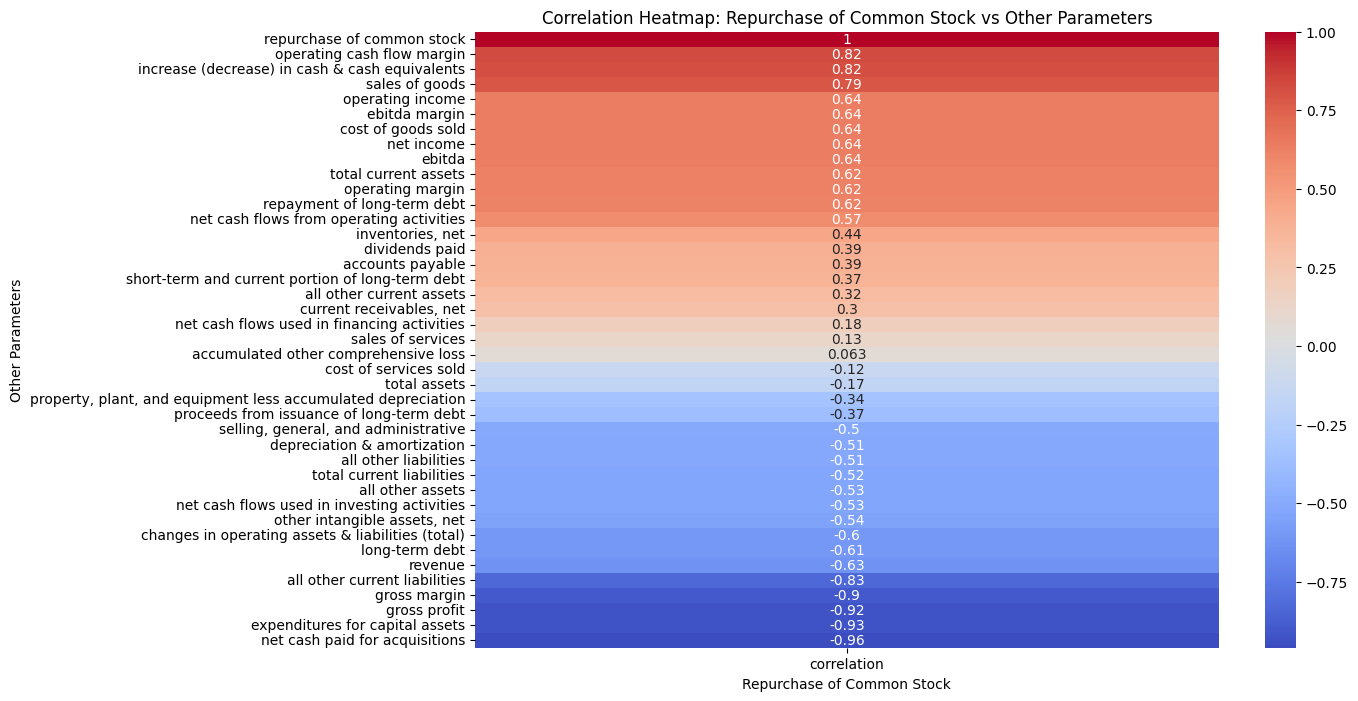

Top 5 correlated parameters saved to: top_5_stock_correlations.csv


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Book1.xlsx'  # Replace with your dataset path
data = pd.ExcelFile(file_path)

# Load the specific sheet
sheet1_data = data.parse('Sheet1')

# Reshape the data so that each parameter in the 'year' column becomes a column
reshaped_data = sheet1_data.set_index('year').transpose()

# Ensure all data is numeric for correlation calculation
reshaped_data = reshaped_data.apply(pd.to_numeric, errors='coerce')

# Check if "repurchase of common stock" exists in the reshaped data
if "repurchase of common stock" not in reshaped_data.columns:
    raise ValueError("'repurchase of common stock' parameter is not found in the dataset.")

# Compute correlations with "repurchase of common stock"
correlations = reshaped_data.corr()["repurchase of common stock"].dropna()

# Extract correlations for the heatmap
heatmap_data = correlations.to_frame(name="correlation").sort_values(by="correlation", ascending=False)

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Repurchase of Common Stock vs Other Parameters")
plt.xlabel("Repurchase of Common Stock")
plt.ylabel("Other Parameters")
plt.show()

# Save the top 5 correlated parameters to a CSV file
top_5_correlations = heatmap_data.head(5)
output_file_path = 'top_5_stock_correlations.csv'  # Update with your desired file path
top_5_correlations.to_csv(output_file_path)

print(f"Top 5 correlated parameters saved to: {output_file_path}")
